# 1. Import the required libraries

In [ ]:
# import dependencies

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
# Loading and splitting the cats_vs_dogs dataset (80/10/10)

(train_ds, val_ds, test_ds), info = tfds.load('cats_vs_dogs', split = ['train[:80%]','train[80%:90%]','train[90%:]'], with_info = True, as_supervised = True)

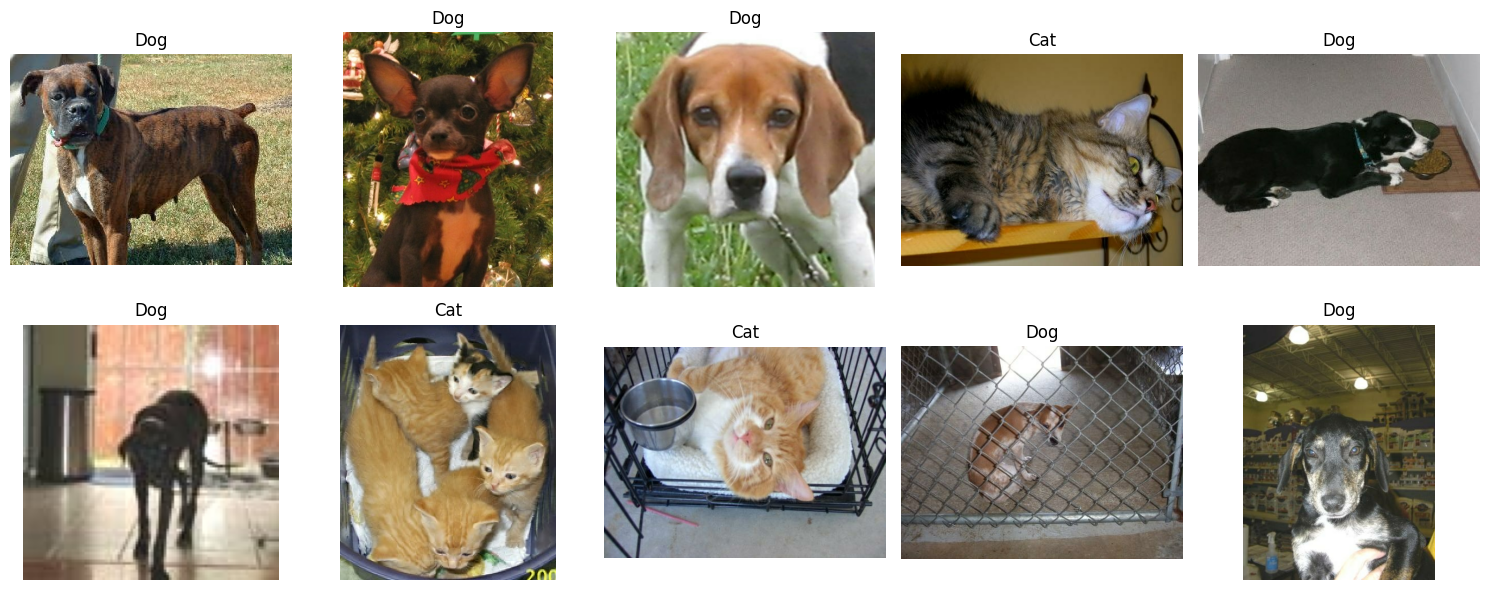

In [ ]:
# Loading images from the dataset
images = []
labels = []

for image, label in train_ds.take(10):
    images.append(image.numpy())
    labels.append(int(label.numpy()))

# Plotting in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title('Cat' if labels[i] == 0 else 'Dog')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [ ]:
# Size of the dataset
train_size = info.splits['train[:80%]'].num_examples
val_size = info.splits['train[80%:90%]'].num_examples
test_size = info.splits['train[90%:]'].num_examples

print("\nNumber of examples (total):", info.splits['train'].num_examples)    # total size of dataset
print("Train size:", train_size)     # training data size
print("Validation size:", val_size)  # validation data size
print("Test size:", test_size)       # testing data size

# Printing data attributes
print("\nData attributes:")
print("\nFeatures:", info.features)
print("\nDataset description:", info.description)
print("\nLabel names (if available):", info.features['label'].names if 'label' in info.features else "No labels")
print("\nDataset version:", info.version)

# Classifying images
print("\nWe are classifying images into two classes:")
print(info.features['label'].names)


Number of examples (total): 23262
Train size: 18610
Validation size: 2326
Test size: 2326

Data attributes:

Features: FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

Dataset description: A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.

Label names (if available): ['cat', 'dog']

Dataset version: 4.0.1

We are classifying images into two classes:
['cat', 'dog']


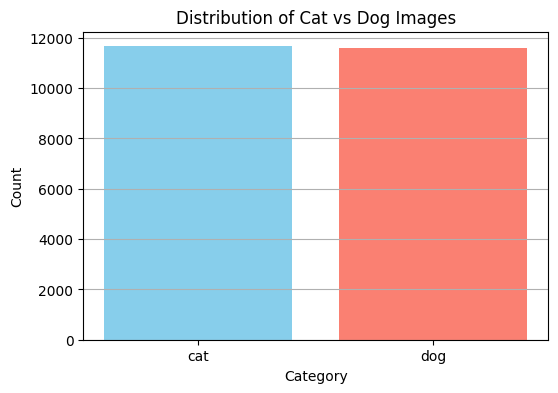

In [ ]:
# Counting label distribution in the dataset
label_counts = {0: 0, 1: 0}  # 0: cat, 1: dog

for image, label in train_ds.concatenate(val_ds).concatenate(test_ds):
    label_counts[int(label.numpy())] += 1

# Mapping labels to class names
label_names = info.features['label'].names
labels = [label_names[0], label_names[1]]
counts = [label_counts[0], label_counts[1]]

# Plotting the distribution
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Distribution of Cat vs Dog Images')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

#### The cat and dog has similar distribution as observed above.

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
# resizing image size for consistentcy
IMG_SIZE = (64, 64)

# setting up the batch size
BATCH_SIZE = 32

In [ ]:
#normalizing the dataset

def normalize(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [64, 64, 1])  # ensure fixed shape
    return image, label


# Applying preprocessing, batching, and prefetching

train_ds = train_ds.map(normalize).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(normalize).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

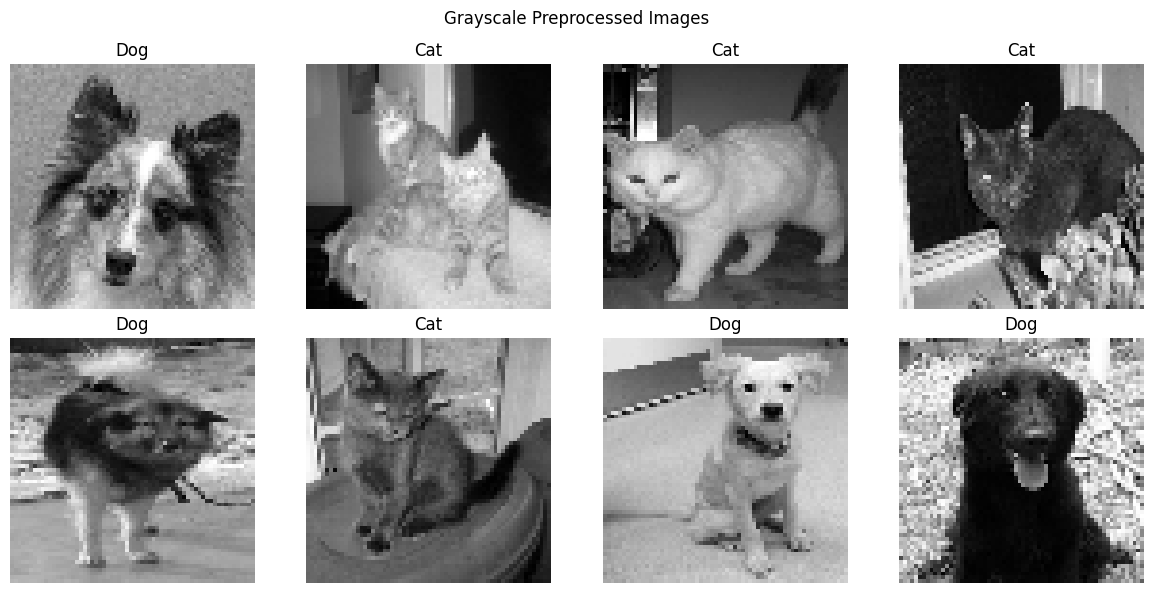

In [ ]:
# Plotting preprocessed and greyscaled images

for images, labels in train_ds.take(1):
    plt.figure(figsize=(12, 6))
    for i in range(8):  # show first 8 images
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # remove channel dim
        plt.title('Cat' if labels[i] == 0 else 'Dog')
        plt.axis('off')
    plt.suptitle("Grayscale Preprocessed Images")
    plt.tight_layout()
    plt.show()

In [ ]:
# checking the shape of the image

for images, labels in train_ds.take(1):  # getting one batch
    print("Batch shape:", images.shape)
    # Checking shape of first image in the batch
    print("First image shape:", images[0].shape)

Batch shape: (32, 64, 64, 1)
First image shape: (64, 64, 1)


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





## Justification
**Identifying the target variable**
*   *The target variable is `label`.*
*   It indicates the class of the image: `0` for cat and `1` for dog.

**Encoding the target variable:**
* The labels are already in integer format (`0` and `1`), so no further encoding is  required for binary classification with a sigmoid output layer.

## 3.3 Split the data into training set and testing set

* *We have already splitted the dataset into 80:10:10 in section 2.1 while loading the dataset.*

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


# **PREPROCESSING REPORT**

---

### **Removing Duplicate Data**
*   No explicit method was used.

> Justification: The cats\_vs\_dogs dataset does not contain duplicates, so this step was not required.

---

### **Handling Missing Data**
*   No removal was needed.

> Justification: There are no missing images or labels in this dataset. Each image is paired with a valid label (0 or 1), so this step was not applicable.

---

### **Removing Data Inconsistencies**
*   No action required.

> Justification: The dataset is already cleaned and verified. All images are valid JPEG files, and labels are consistent. No inconsistencies were found.

---

### **Encoding Categorical Data**
*   Labels were already encoded as integers. 0 for cat and 1 for dog.

> Justification: Since this is a binary classification task, no further encoding was necessary.

---

### **Normalization Technique**
*   Pixel values of images were scaled to \[0, 1] by dividing by 255.

> Justification: Normalizing pixel values helps in faster and more stable training of neural networks by ensuring uniform value ranges across all input features.

---

# **Dataset Size Report**

| Dataset Split | Size   |
| :------------ | :----- |
| Training Set  | 18610 |
| Validation Set| 2326 |
| Testing Set   | 2326 |

*(Sizes obtained from code in section 2.1)*

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
# building the dnn model

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

       Dense(1024, activation='relu'),
       BatchNormalization(),
       Dropout(0.5),

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.4),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.3),


      Dense(128, activation = 'relu'),
      Dropout(0.2),


      Dense(64, activation = 'relu'),
      Dropout(0.1),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
print("--------------------------------------DNN REPORT---------------------------------------------------------------------------------------------------------------")
model.summary()
print("\nTotal number of layers are 15 in which 9 layers are trainable.")
print("Units per layer : 1024,512,256,128,64 and 1.")
print("Justification : The architecture is deep enough to capture complex patterns but regularized (using dropout and batch norm) to prevent overfitting, making it suitable for image classification tasks.")

--------------------------------------DNN REPORT---------------------------------------------------------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,899,841 (18.69 MB)

 Trainable params: 4,896,257 (18.68 MB)

 Non-trainable params: 3,584 (14.00 KB)


Total number of layers are 15 in which 9 layers are trainable.
Units per layer : 1024,512,256,128,64 and 1.
Justification : The architecture is deep enough to capture complex patterns but regularized (using dropout and batch norm) to prevent overfitting, making it suitable for image classification tasks.


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
# train the model
history_m1 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 56s 84ms/step - accuracy: 0.5106 - loss: 0.7566 - val_accuracy: 0.5851 - val_loss: 0.6749
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.5379 - loss: 0.6986 - val_accuracy: 0.5997 - val_loss: 0.6693
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.5600 - loss: 0.6842 - val_accuracy: 0.6075 - val_loss: 0.6629
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.5682 - loss: 0.6765 - val_accuracy: 0.6053 - val_loss: 0.6575
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - accuracy: 0.5770 - loss: 0.6744 - val_accuracy: 0.6045 - val_loss: 0.6562
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.5889 - loss: 0.6697 - val_accuracy: 0.6079 - val_loss: 0.6537
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 49s 82ms/step - accuracy: 0.5925 - loss: 0.6677 - val_accuracy: 0.6096 - val_loss: 0.6537
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.5899 - loss: 0.6686 - 

In [ ]:
best_val_loss = np.min(history_m1.history['val_loss'])
print(f'Lowest Validation Loss During Training is {best_val_loss}')

Lowest Validation Loss During Training is 0.6432690024375916


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


## Hyperparameters and Regularizers Justification

Below is a breakdown of the hyperparameters and regularizers used in the model:

### Hyperparameters:

*   **Learning Rate (0.001):** A small learning rate is chosen for SGD to help the model learn gradually and avoid skipping over the optimal solution.
*   **Epochs (20):** Starting with 20 epochs allows us to see how the model performs.
*   **Batch Size (32):** Batch size of 32 strikes a balance between training speed, memory usage, and model performance.
*   **Image Size (64x64):** Resizing images to 64x64 keeps the input size manageable, speeds up training, and still preserves enough detail to classify cats vs. dogs.

### Regularizers:

*   **Dropout:** Dropout layers with rates (0.4, 0.3, 0.2, 0.1) help reduce overfitting by randomly turning off some neurons during training, forcing the model to learn more general features.
*   **Batch Normalization:** Normalizes activations in the network, making training more stable and faster, and helps the model converge better.

# 6. Test the model - 0.5 marks


In [ ]:
# testing the model

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6029 - loss: 0.6585
Test Loss: 0.6458, Test Accuracy: 0.6264


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


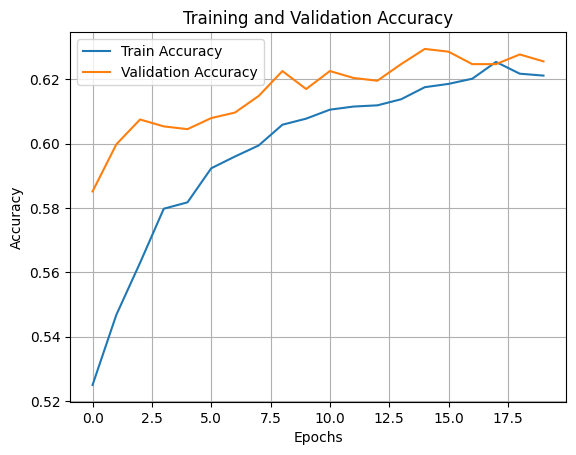

In [ ]:
# plotting training and validation accuracy

plt.plot(history_m1.history['accuracy'], label='Train Accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

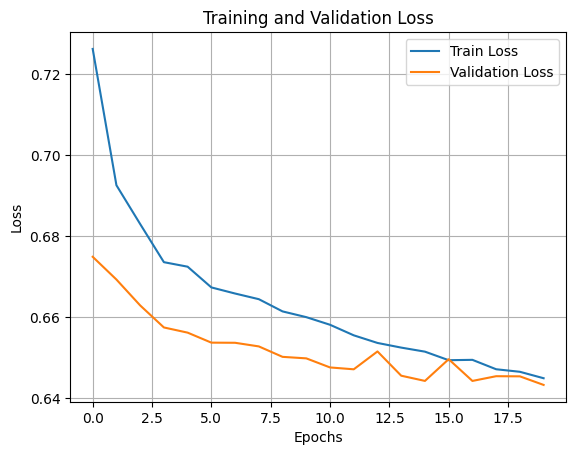

In [ ]:
# plotting training and validation loss

plt.plot(history_m1.history['loss'], label='Train Loss')
plt.plot(history_m1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# testing the model
# printing the testing accuracy and loss

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6029 - loss: 0.6585
Test Loss: 0.6458, Test Accuracy: 0.6264


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

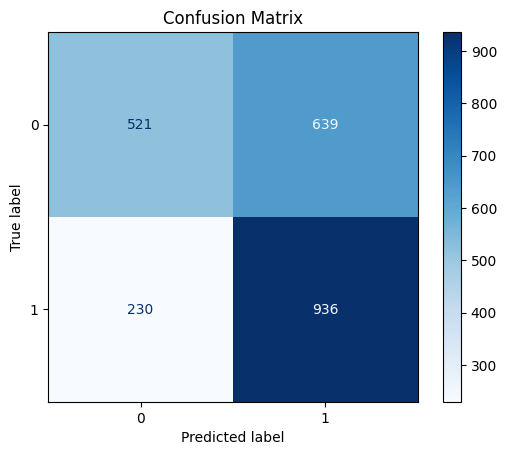

In [ ]:
# Get true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    # Apply a threshold of 0.5 for binary classification
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# printing performance study matrix

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.45      0.55      1160
           1       0.59      0.80      0.68      1166

    accuracy                           0.63      2326
   macro avg       0.64      0.63      0.61      2326
weighted avg       0.64      0.63      0.61      2326



# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
# MODEL 2
# REDUCING one layer from last training model

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.4),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.3),


      Dense(128, activation = 'relu'),
      Dropout(0.2),


      Dense(64, activation = 'relu'),
      Dropout(0.1),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model by reducing one layer
history_m2 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.5457 - loss: 0.7400 - val_accuracy: 0.5800 - val_loss: 0.6694
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.5694 - loss: 0.6865 - val_accuracy: 0.6152 - val_loss: 0.6556
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.5820 - loss: 0.6775 - val_accuracy: 0.6187 - val_loss: 0.6502
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5946 - loss: 0.6690 - val_accuracy: 0.6290 - val_loss: 0.6468
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.6021 - loss: 0.6635 - val_accuracy: 0.6195 - val_loss: 0.6452
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.6005 - loss: 0.6606 - val_accuracy: 0.6273 - val_loss: 0.6442
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.6103 - loss: 0.6569 - val_accuracy: 0.6298 - val_loss: 0.6420
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.6138 - loss: 0.6550 - 

In [ ]:
# MODEL 3
# INCREASING one layer from last training model
# building the dnn model

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

      Dense(2048, activation='relu'),
      BatchNormalization(),
      Dropout(0.5),

      Dense(1024, activation='relu'),
      BatchNormalization(),
      Dropout(0.5),

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.4),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.3),


      Dense(128, activation = 'relu'),
      Dropout(0.2),


      Dense(64, activation = 'relu'),
      Dropout(0.1),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model by increasing one layer
history_m3 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 92s 150ms/step - accuracy: 0.5141 - loss: 0.7929 - val_accuracy: 0.5533 - val_loss: 0.6857
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 143s 153ms/step - accuracy: 0.5380 - loss: 0.7045 - val_accuracy: 0.5585 - val_loss: 0.6843
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 151ms/step - accuracy: 0.5512 - loss: 0.6898 - val_accuracy: 0.5688 - val_loss: 0.6796
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 90s 153ms/step - accuracy: 0.5634 - loss: 0.6833 - val_accuracy: 0.5808 - val_loss: 0.6773
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 152ms/step - accuracy: 0.5647 - loss: 0.6823 - val_accuracy: 0.5920 - val_loss: 0.6702
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 90s 153ms/step - accuracy: 0.5822 - loss: 0.6753 - val_accuracy: 0.5890 - val_loss: 0.6697
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 88s 150ms/step - accuracy: 0.5871 - loss: 0.6691 - val_accuracy: 0.5894 - val_loss: 0.6700
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 95s 162ms/step - accuracy: 0.5857 - loss

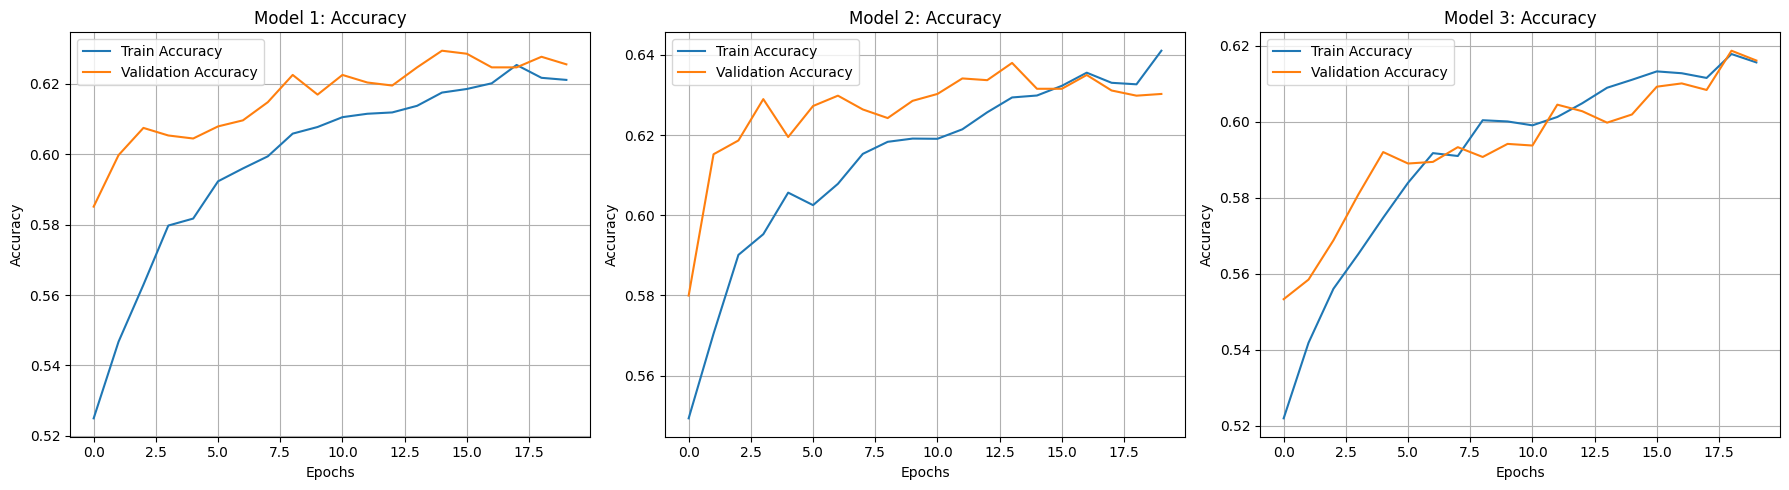

In [ ]:
# Comparison between Model 1 , Model 2 and Model 3

plt.figure(figsize=(18, 5))  # wider figure for horizontal layout

# --- Model 1 : General Model with SGD  ---
plt.subplot(1, 3, 1)
plt.plot(history_m1.history['accuracy'], label='Train Accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 2 : Decreased one layer with SGD---
plt.subplot(1, 3, 2)
plt.plot(history_m2.history['accuracy'], label='Train Accuracy')
plt.plot(history_m2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 3 : Increased one layer with SGD---
plt.subplot(1, 3, 3)
plt.plot(history_m3.history['accuracy'], label='Train Accuracy')
plt.plot(history_m3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
# MODEL 4
# building the dnn model
# using dropout of 0.25 in the layers

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

       Dense(1024, activation='relu'),
       BatchNormalization(),
       Dropout(0.25),

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.25),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.25),


      Dense(128, activation = 'relu'),
      Dropout(0.25),


      Dense(64, activation = 'relu'),
      Dropout(0.25),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model
history_m4 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 96ms/step - accuracy: 0.5286 - loss: 0.7806 - val_accuracy: 0.6113 - val_loss: 0.6606
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.5612 - loss: 0.6858 - val_accuracy: 0.6178 - val_loss: 0.6565
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 72s 85ms/step - accuracy: 0.5755 - loss: 0.6724 - val_accuracy: 0.6066 - val_loss: 0.6528
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.5953 - loss: 0.6663 - val_accuracy: 0.6204 - val_loss: 0.6471
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6032 - loss: 0.6622 - val_accuracy: 0.6212 - val_loss: 0.6435
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.6115 - loss: 0.6581 - val_accuracy: 0.6247 - val_loss: 0.6436
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.6093 - loss: 0.6570 - val_accuracy: 0.6273 - val_loss: 0.6408
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.6234 - loss: 0.6493 -

In [ ]:
# MODEL 5
# using dropout of 0.25 in the layers
# using l2 regularizer with factor 1e-04
# building dnn model

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

       Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(1e-04)),
       BatchNormalization(),
       Dropout(0.25),

      Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(1e-04)),
      BatchNormalization(),     # normalizing the data
      Dropout(0.25),

      Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(1e-04)),
      BatchNormalization(),     # normalizing the data
      Dropout(0.25),


      Dense(128, activation = 'relu'),
      Dropout(0.25),


      Dense(64, activation = 'relu'),
      Dropout(0.25),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model
history_m5 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.5246 - loss: 1.0296 - val_accuracy: 0.6019 - val_loss: 0.9311
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.5648 - loss: 0.9490 - val_accuracy: 0.6040 - val_loss: 0.9229
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 56s 95ms/step - accuracy: 0.5866 - loss: 0.9361 - val_accuracy: 0.6191 - val_loss: 0.9176
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 57s 96ms/step - accuracy: 0.6007 - loss: 0.9264 - val_accuracy: 0.6204 - val_loss: 0.9125
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 57s 96ms/step - accuracy: 0.5994 - loss: 0.9269 - val_accuracy: 0.6255 - val_loss: 0.9097
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 56s 94ms/step - accuracy: 0.6054 - loss: 0.9230 - val_accuracy: 0.6131 - val_loss: 0.9064
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step - accuracy: 0.6121 - loss: 0.9175 - val_accuracy: 0.6212 - val_loss: 0.9057
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 57s 96ms/step - accuracy: 0.6192 - loss: 0.9089 -

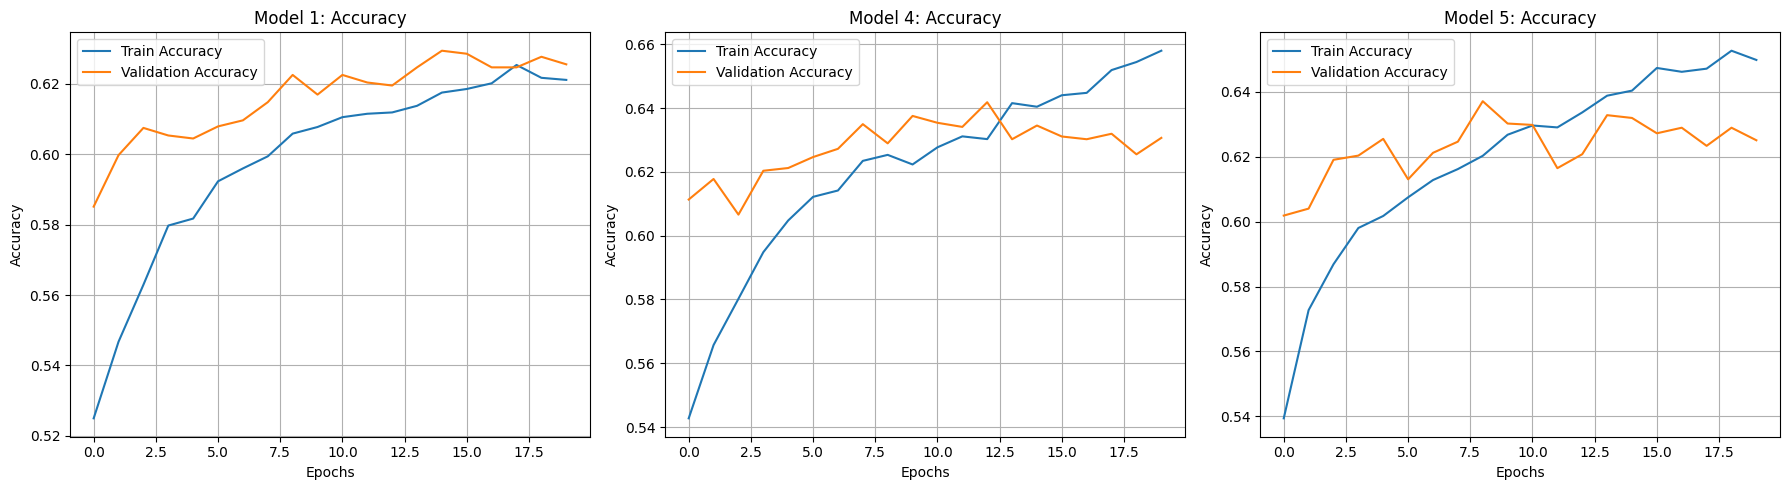

In [ ]:
# Comparison between Model 1 , Model 4 and Model 5

plt.figure(figsize=(18, 5))  # wider figure for horizontal layout

# --- Model 1 : General Model with SGD  ---
plt.subplot(1, 3, 1)
plt.plot(history_m1.history['accuracy'], label='Train Accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 4 : Using dropout of 0.25 with SGD ---
plt.subplot(1, 3, 2)
plt.plot(history_m4.history['accuracy'], label='Train Accuracy')
plt.plot(history_m4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 5 Using Dropout of 0.25 and L2 regulariser with factor 1e−04 with SGD ---
plt.subplot(1, 3, 3)
plt.plot(history_m5.history['accuracy'], label='Train Accuracy')
plt.plot(history_m5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
# MODEL 6
# dnn architecture with rms prop optimizer

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

       Dense(1024, activation='relu'),
       BatchNormalization(),
       Dropout(0.5),

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.4),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.3),


      Dense(128, activation = 'relu'),
      Dropout(0.2),


      Dense(64, activation = 'relu'),
      Dropout(0.1),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# using rms prop optimizer
# compiling the model
# setting up a custom learning rate for better convergence
optimizer = RMSprop(learning_rate=0.001, momentum=0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train model with rms prop
history_m6 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.5227 - loss: 0.7291 - val_accuracy: 0.5593 - val_loss: 0.6826
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.5604 - loss: 0.6878 - val_accuracy: 0.6058 - val_loss: 0.6677
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.5810 - loss: 0.6787 - val_accuracy: 0.5929 - val_loss: 0.6730
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 64s 108ms/step - accuracy: 0.5844 - loss: 0.6748 - val_accuracy: 0.6281 - val_loss: 0.6561
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step - accuracy: 0.5976 - loss: 0.6709 - val_accuracy: 0.6208 - val_loss: 0.6540
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 60s 102ms/step - accuracy: 0.6034 - loss: 0.6637 - val_accuracy: 0.6062 - val_loss: 0.6564
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 106ms/step - accuracy: 0.6083 - loss: 0.6618 - val_accuracy: 0.6122 - val_loss: 0.6625
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.6045 - loss: 0

In [ ]:
# MODEL 7
# dnn architecture with adam optimizer

model = Sequential([

      tf.keras.Input(shape = (64,64,1)),     # explicitely defining the input area
      Flatten(),             # converting the data in 1D

       Dense(1024, activation='relu'),
       BatchNormalization(),
       Dropout(0.5),

      Dense(512, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.4),

      Dense(256, activation = 'relu'),
      BatchNormalization(),     # normalizing the data
      Dropout(0.3),


      Dense(128, activation = 'relu'),
      Dropout(0.2),


      Dense(64, activation = 'relu'),
      Dropout(0.1),

      Dense(1, activation = 'sigmoid')  # using sigmoid in output layer for binary classification usecase

])

In [ ]:
# using adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# train model with adam optimizer
history_m7 = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.5312 - loss: 0.7333 - val_accuracy: 0.6045 - val_loss: 0.6710
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.5772 - loss: 0.6778 - val_accuracy: 0.6019 - val_loss: 0.6584
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 64s 109ms/step - accuracy: 0.5927 - loss: 0.6661 - val_accuracy: 0.6139 - val_loss: 0.6522
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 104ms/step - accuracy: 0.6085 - loss: 0.6559 - val_accuracy: 0.6178 - val_loss: 0.6519
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 107ms/step - accuracy: 0.6068 - loss: 0.6580 - val_accuracy: 0.6204 - val_loss: 0.6508
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.6217 - loss: 0.6509 - val_accuracy: 0.6161 - val_loss: 0.6517
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 106ms/step - accuracy: 0.6167 - loss: 0.6497 - val_accuracy: 0.6281 - val_loss: 0.6481
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.6214 - loss: 0

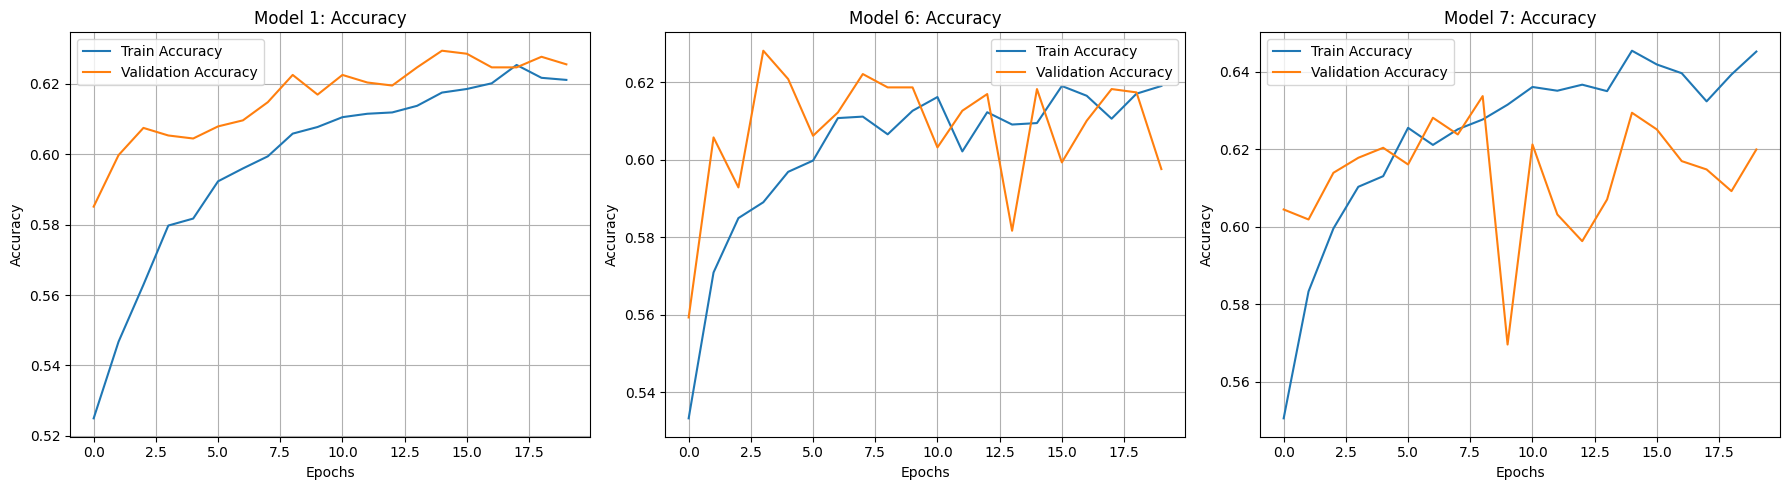

In [ ]:
# plot comparison between rms prop and adam optimizer

# Comparison between Model 1 , Model 4 and Model 5

plt.figure(figsize=(18, 5))  # wider figure for horizontal layout

# --- Model 1 : General Model with SGD  ---
plt.subplot(1, 3, 1)
plt.plot(history_m1.history['accuracy'], label='Train Accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 6 : Model using RMS Prop Optimizer ---
plt.subplot(1, 3, 2)
plt.plot(history_m6.history['accuracy'], label='Train Accuracy')
plt.plot(history_m6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 6: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Model 7 : Model using Adam Optimizer ---
plt.subplot(1, 3, 3)
plt.plot(history_m7.history['accuracy'], label='Train Accuracy')
plt.plot(history_m7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 7: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


Based on the experiments conducted in sections 4.1, 8, 9, and 10, we can draw the following conclusions :

>**Impact of Model Architecture (Section 8):**

Comparing Model 1 (original architecture), Model 2 (decreased layers), and Model 3 (increased layers) with the SGD optimizer:

*   **Model 1 (Original):** We have achieved a test accuracy of approximately 62.64% and a test loss of 0.6458.
*   **Model 2 (Decreased Layers):** We observed that it showed slightly better performance during training and validation compared to Model 1, reaching a higher peak validation accuracy. This suggests that the original architecture might have been slightly more complex than necessary for this dataset and task.
*   **Model 3 (Increased Layers):** Generally performed worse than Model 1 and Model 2, with lower training and validation accuracy and higher loss. This indicates that adding more layers without significant changes to the regularization or data might lead to overfitting or difficulty in training.

> **Impact of Regularization (Section 9):**

Comparing Model 1 (original regularization), Model 4 (Dropout 0.25), and Model 5 (Dropout 0.25 + L2 regularization) with the SGD optimizer:

*   **Model 4 (Dropout 0.25):** Showed improved training accuracy compared to Model 1, and the validation accuracy was also generally higher and more stable. This indicates that a dropout rate of 0.25 helped in reducing overfitting to some extent.
*   **Model 5 (Dropout 0.25 + L2):** While showing similar trends in training accuracy as Model 4, the validation accuracy was generally lower and the loss was significantly higher due to the L2 regularization term being added to the loss function. This suggests that the chosen L2 regularization factor might be too strong or the combination with this dropout rate is not optimal for this dataset.

> **Impact of Optimizers (Section 10):**

Comparing Model 1 (SGD), Model 6 (RMSprop), and Model 7 (Adam) with the original architecture and regularization:

*   **Model 6 (RMSprop):** Showed fluctuating validation accuracy during training and did not consistently outperform the SGD optimizer (Model 1).
*   **Model 7 (Adam):** Also showed fluctuations in validation accuracy and did not consistently outperform the SGD optimizer (Model 1). In some epochs, the validation loss increased significantly, indicating potential issues with convergence or hyperparameter tuning for Adam on this dataset.

> **Overall Conclusion:**

Considering the performance across all experiments, **Model 4 (Original Architecture with Dropout 0.25 and SGD optimizer)** appears to be the best-performing model among those tested. It achieved better validation accuracy compared to all the other models.

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck